Python 資料型態 - datetime / timedelta

Documents : https://docs.python.org/3/library/datetime.html

In [1]:
from datetime import datetime
now = datetime.now()
now #現在時間(年,月,日,時,分,秒,微秒) ps: 微秒(microseconds)=1/1000000秒

datetime.datetime(2020, 4, 12, 12, 4, 10, 247144)

In [2]:
#attributes
print (now.year, now.month, now.day, now.hour, now.minute, now.second, now.microsecond)

#methonds (functions)
print (now.weekday()) # Monday is 0 and Sunday is 6
print (now.isoformat()) # representing the date in ISO 8601 format

2020 4 12 12 4 10 247144
6
2020-04-12T12:04:10.247144


In [3]:
delta = datetime(2016, 11, 27, 16, 39, 47, 748848) - datetime(2015, 1, 1)
delta #(日,秒,微秒)

datetime.timedelta(days=696, seconds=59987, microseconds=748848)

In [4]:
print (delta.days, delta.seconds, delta.microseconds)

696 59987 748848


In [5]:
 from datetime import timedelta
datetime(2015, 10, 10, 8, 15) + timedelta(12,10,10)

datetime.datetime(2015, 10, 22, 8, 15, 10, 10)

parse string to datetime

In [6]:
from datetime import datetime

date = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
#strptime str pass time
date

datetime.datetime(2005, 6, 1, 13, 33)

In [7]:
date = datetime.strptime('2011/02/10 13:33', '%Y/%m/%d %H:%M')
date

datetime.datetime(2011, 2, 10, 13, 33)

In [8]:
date = datetime.strptime('2016-05-30 13:33:50', '%Y-%m-%d %H:%M:%S')
date

datetime.datetime(2016, 5, 30, 13, 33, 50)

In [9]:
date = datetime.strptime('2016-Aug-30 13:33:50', '%Y-%b-%d %H:%M:%S')
date

datetime.datetime(2016, 8, 30, 13, 33, 50)

convert datetime to string

In [14]:
print(datetime.strftime(date, '%Y-%m-%d %H:%M:%S'))
type(datetime.strftime(date, '%Y-%m-%d %H:%M:%S'))

2016-08-30 13:33:50


str

範例：全球地表溫度分析

In [15]:
import pandas as pd
df = pd.read_csv("/Users/ethan/Desktop/AI/python資料科學/python-data-science-practice/Data analyze practice/(Mac) w3-2. 資料分析方法/GlobalTemperatures.csv", encoding='big5')
df[:20]

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,14.750
8,1750-09-01,11.413
9,1750-10-01,6.367


In [16]:
df = df[df['LandAverageTemperature'].notnull()]
#去除ＮaN
df[:20]

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,14.750
8,1750-09-01,11.413
9,1750-10-01,6.367


In [17]:
#通常把時間用在index,這樣可以有更厲害的應用，畫圖直接變Ｘ軸
 

In [20]:
df = df.set_index(df['dt'],drop = True)
del df['dt']
df[:10]

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
1750-06-01,12.937
1750-07-01,15.868
1750-08-01,14.750
1750-09-01,11.413


In [41]:

df.loc['1750-04-01','LandAverageTemperature']

8.49

In [42]:
#時間要把str變成datetime在index才好用，變成DatetimeIndex
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [43]:
df.index.weekday

Int64Index([3, 6, 6, 2, 4, 0, 2, 5, 1, 3,
            ...
            6, 2, 4, 0, 2, 5, 1, 3, 6, 1],
           dtype='int64', name='dt', length=3180)

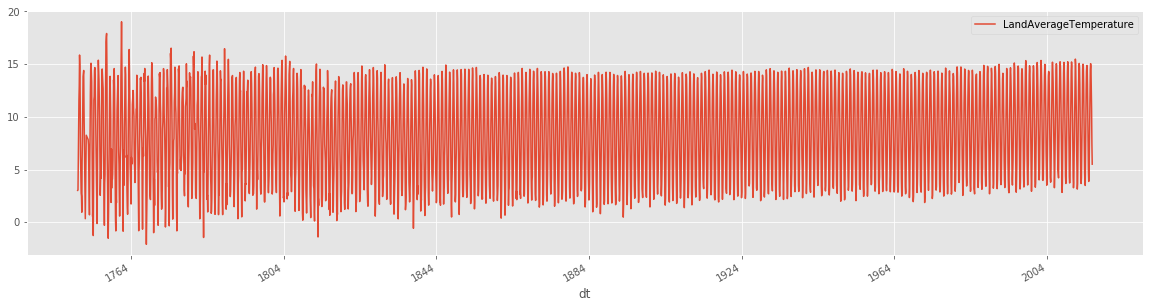

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df.plot(kind='line',figsize=(20,5))

In [45]:
df2 = df.groupby(df.index.year).mean()
df2[:5]

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


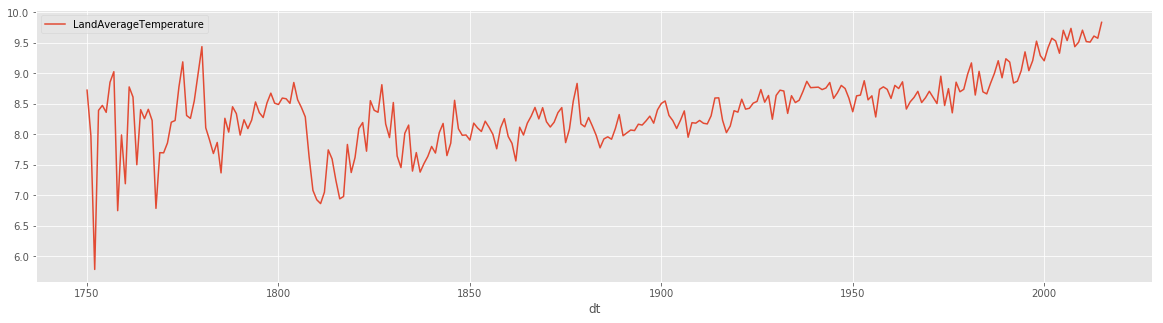

In [46]:
df2.plot(kind='line',figsize=(20,5))

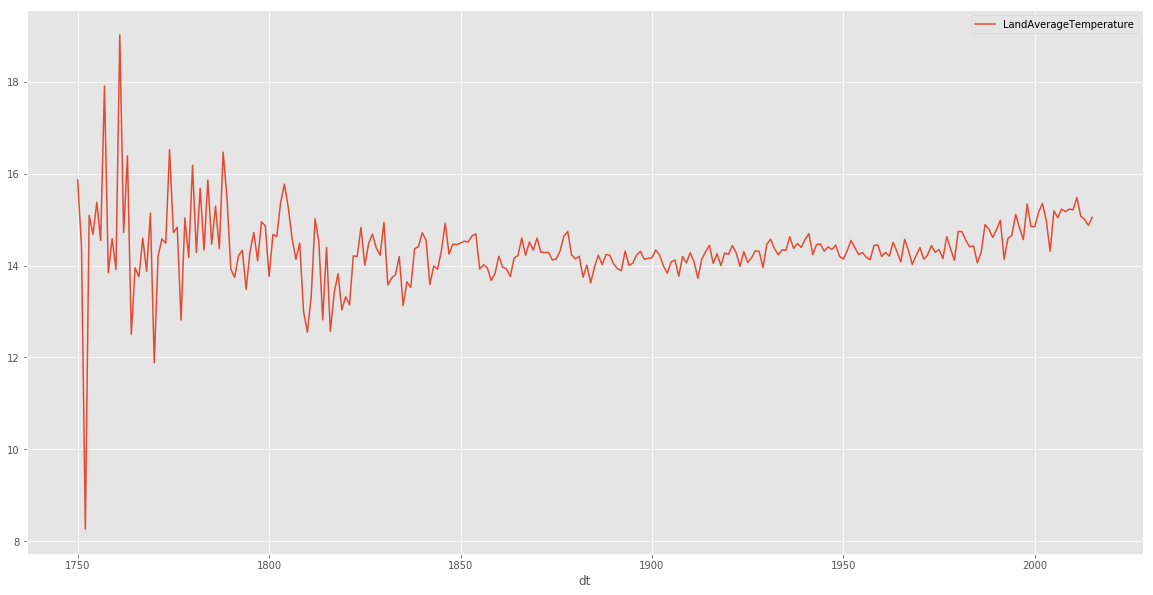

In [47]:
df_year_max = df.groupby(df.index.year).max()
df_year_max.plot(kind='line',figsize=(20,10))

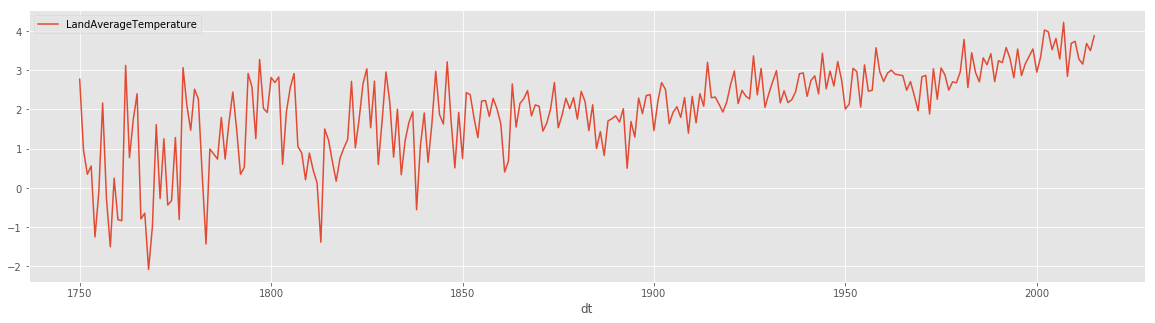

In [48]:
df_year_min = df.groupby(df.index.year).min()
df_year_min.plot(kind='line',figsize=(20,5))

In [49]:
df_Q = df.resample('Q-NOV').mean()
#分四季，最後為11月，12月開始算第一季
df_Q[df_Q.index.year > 2012]

,LandAverageTemperature
dt,
2013-02-28,4.003000
2013-05-31,9.166667
2013-08-31,14.771000
2013-11-30,10.278000
2014-02-28,3.985333
2014-05-31,9.516333
2014-08-31,14.694333
2014-11-30,10.044667
2015-02-28,4.465000


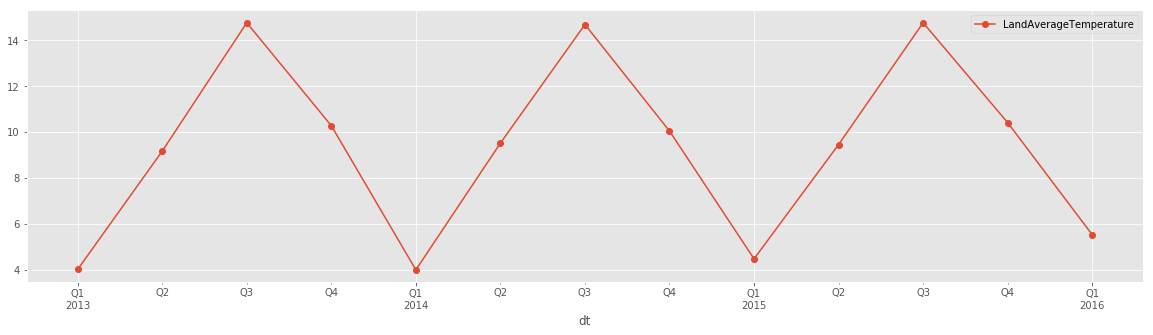

In [50]:
df_Q[df_Q.index.year > 2012].plot(kind='line',style='-o',figsize=(20,5))

In [51]:
df_M = df.resample('M').mean() #以月來切分
df_M[df_M.index.year > 2014]

,LandAverageTemperature
dt,
2015-01-31,3.881
2015-02-28,4.664
2015-03-31,6.740
2015-04-30,9.313
2015-05-31,12.312
2015-06-30,14.505
2015-07-31,15.051
2015-08-31,14.755
2015-09-30,12.999
